<a href="https://colab.research.google.com/github/PINKIREKHA/yulu_business_case_study/blob/main/YULU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd     #importing al lthe required libraries and modlues
import numpy as np
import scipy.stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import seaborn  as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency


In [ ]:
df = pd.read_csv("yulu.txt")   # converting data set to dataframe
df.head()  # top 5 rows

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape   # to check number of rows and columns

(10886, 12)

In [ ]:
df.info()  # to get the data type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.isna().sum()  # to check null values  and finding he total number

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.describe()  #to generate descriptive statistics

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


UNIVARIATE ANALYSIS

<Axes: xlabel='casual', ylabel='Count'>

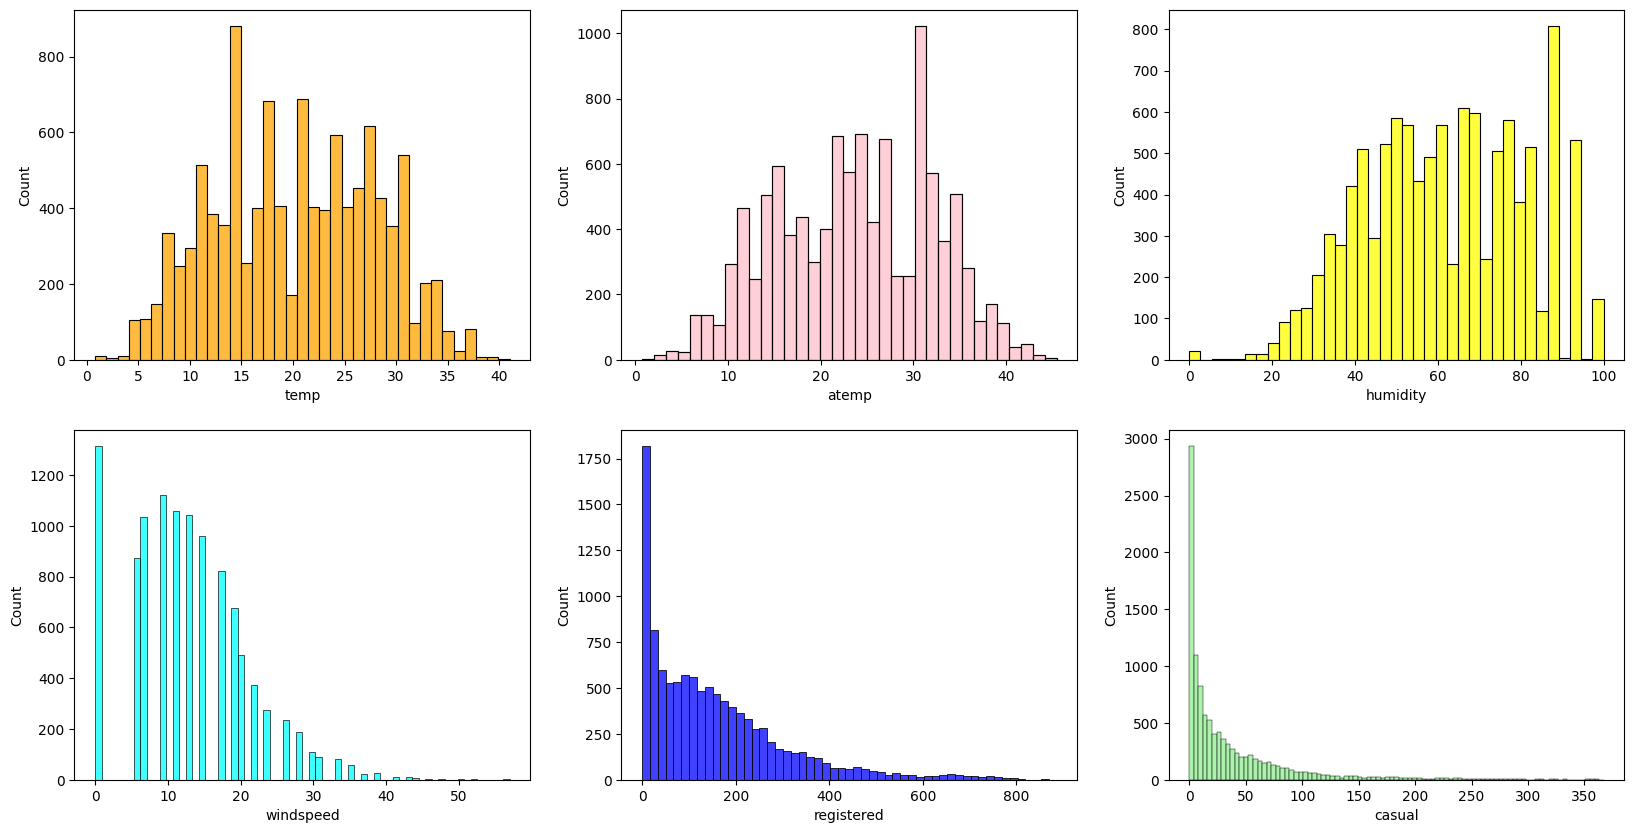

In [ ]:
fig, axis = plt.subplots(nrows = 2,ncols = 3,figsize=(20, 10))
sns.histplot(x = df["temp"], ax=axis[0,0], color = "orange")
sns.histplot(x = df["atemp"], ax=axis[0,1], color = "pink")
sns.histplot(x = df["humidity"], ax=axis[0,2], color = "yellow")
sns.histplot(x = df["windspeed"], ax=axis[1,0], color = "aqua")
sns.histplot(x = df["registered"], ax=axis[1,1], color = "blue")
sns.histplot(x = df["casual"], ax=axis[1,2], color = "lightgreen")

BIVARIATE ANALYSIS

<Axes: xlabel='weather', ylabel='count'>

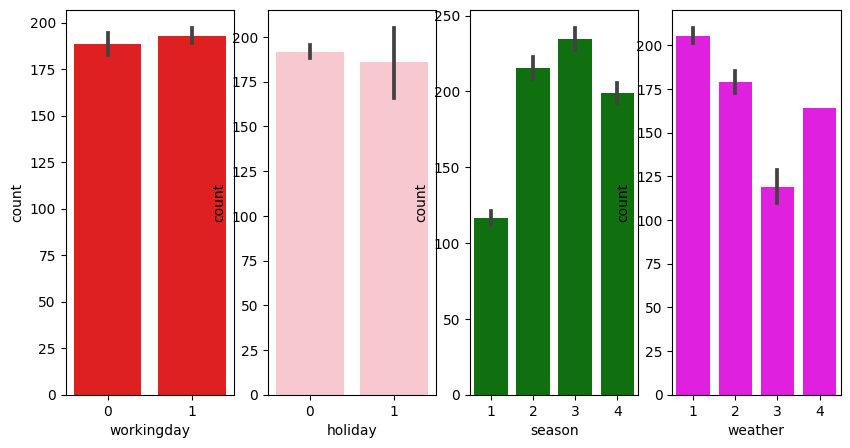

In [ ]:
fig, axis = plt.subplots(ncols = 4,figsize=(10,5))
sns.barplot(x = df["workingday"],y = df["count"], ax=axis[0], color = "red")
sns.barplot(x = df["holiday"],y = df["count"],ax=axis[1],color = "pink")
sns.barplot(x = df["season"],y = df["count"],ax=axis[2], color = "green")
sns.barplot(x = df["weather"],y = df["count"],ax=axis[3],color = "magenta")



CHECKING OUTLIERS

<Axes: >

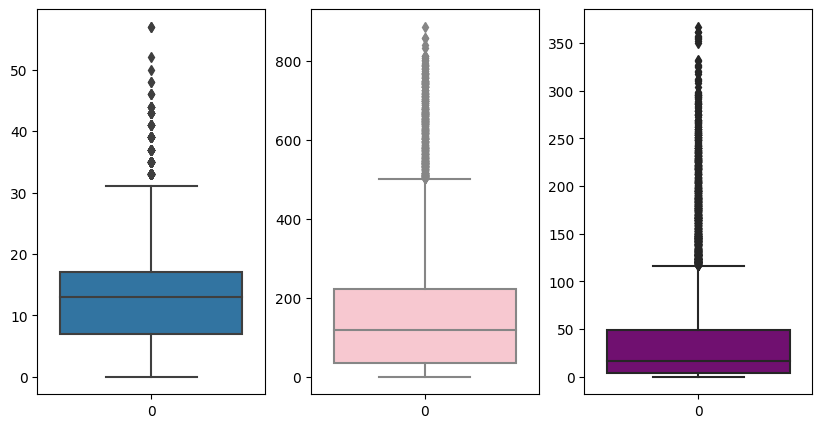

In [ ]:
fig, axis = plt.subplots(ncols = 3,figsize=(10, 5))
sns.boxplot(df["windspeed"],ax = axis[0])
sns.boxplot(df["registered"],ax = axis[1], color = "pink")
sns.boxplot(df["casual"],ax = axis[2], color = "purple")

Working Day has effect on number of electric cycles rented

In [ ]:
# setting significance level (alpha) as 0.05

In [ ]:
sample_df = df.sample(500)  #taknig sample of 500


In [ ]:
new = sample_df[sample_df["workingday"]==0]  # for a nonworking day
a = new["count"]

In [ ]:
new1 = sample_df[sample_df["workingday"]==1]  # for working day
b = new1["count"]

In [ ]:
# H0: working day has no effect in number of vehicles rented
# Ha : working day has an effect in number of vehicles rented
tstatistic,pvalue = scipy.stats.ttest_ind(a,b)  #ttest
print("tstatistic: ",tstatistic)
print("p value: ",pvalue)
alpha = 0.05
if pvalue < 0.05:
  print("reject ho : working day has an effect in number of vehicles rented")
else:
  print("failed to reject ho : working day has no effect in number of vehicles rented")


tstatistic:  -0.21011638809250208
p value:  0.8336627707965031
failed to reject ho : working day has no effect in number of vehicles rented


No. of cycles rented similar or different in different seasons

In [ ]:
sample_df["season"].unique()   #total seasons

array([4, 3, 1, 2])

In [ ]:
season1 = sample_df[sample_df["season"]==1]
season2 = sample_df[sample_df["season"]==2]
season3 = sample_df[sample_df["season"]==3]
season4 = sample_df[sample_df["season"]==4]

In [ ]:
# Ho: number of cylces are same in diff seasons
# ha: number of cycles are different in different sesons

f_statistic,pvalue = f_oneway(season1["count"],season2["count"],season3["count"],season4["count"])  #ANOVA
print("f_statistic: ", f_statistic)
print("p_value:",pvalue)
alpha = 0.05
if pvalue <0.05:
  print("reject ho : number of cycles are different in different sesons")
else:
  print("failed to reject ho :number of cycles are same in different sesons")

f_statistic:  15.647588662195693
p_value: 9.730460125936882e-10
reject ho : number of cycles are different in different sesons


No. of cycles rented similar or different in different weather

In [ ]:
sample_df["weather"].unique()  #total  unique weathers

array([1, 2, 3])

In [ ]:
weather1= sample_df[sample_df["weather"]==1]
weather2 = sample_df[sample_df["weather"]==2]
weather3 = sample_df[sample_df["weather"]==3]

In [ ]:
# Ho: number of cylces are same in diff weathers
# ha: number of cycles are different in different weather

f_stat,pvalue = f_oneway(weather1["count"],weather2["count"],weather3["count"]) #ANOVA
print("p_value:",pvalue)
alpha = 0.05
if pvalue <0.05:
  print("reject ho : number of cycles are different in different weather")
else:
  print("failed to reject ho :number of cycles are same in different weather")

p_value: 0.021078554174076246
reject ho : number of cycles are different in different weather


Weather is dependent on season (check between 2 predictor variable)

In [ ]:
contingency_table = pd.crosstab(sample_df["weather"], sample_df["season"]) # crosstab of weather and season bikes count
contingency_table

season,1,2,3,4
weather,,,,
1,82,86,84,85
2,45,39,14,35
3,11,7,5,7


In [ ]:
# Ho: weather is not dependent on season
# Ha: weather is dependent on season
chi2_contingency(contingency_table)
print("chi_Statistics:" ,statistic)   #chi square test of independence
print("p value: ",pvalue)
if 0.016112623198587965 < 0.05:
  print("reject ho : weather is dependent on season")
else:
  print("failed to reject ho : weather is not dependent on season")

chi_Statistics: -0.21011638809250208
p value:  9.730460125936882e-10
reject ho : weather is dependent on season


In [ ]:
df["registered"].nunique()


731

In [ ]:
df["casual"].nunique()

309